## Sign up for Spotify developer account
* Connect developer account to regular spotify account.
* Accept terms.
* Create a non-commercial app

In [1]:
import sys
import spotipy
import spotipy.util as util
import os
from pprint import pprint

with open('config.txt') as f:
    content = f.readlines()
    
os.environ['SPOTIPY_CLIENT_ID'] = content[0].strip()
os.environ['SPOTIPY_CLIENT_SECRET'] = content[1].strip()
os.environ['SPOTIPY_REDIRECT_URI'] = content[2].strip()

username = content[3].strip()
scope = 'user-top-read user-follow-modify' #separated by spaces
token = util.prompt_for_user_token(username, scope)

In [2]:
sp = spotipy.Spotify(auth=token)

In [3]:
top_artists = sp.current_user_top_artists(limit=5, offset=0, time_range='short_term')['items']
print("Your favorite artists:")
for a in range(len(top_artists)):
    print(top_artists[a]['name'])

Your favorite artists:
The Weeknd
Drake
Migos
Travis Scott
Kanye West


In [4]:
urn = 'spotify:artist:3CQIn7N5CuRDP8wEI7FiDA' #Run DMC 
artist = sp.artist(urn)
artist_name = artist['name']

print('*'*40)

related = sp.artist_related_artists(urn)['artists']
print('Artists related to {}:'.format(artist_name))
for a in range(len(related)):
    print(related[a]['name'])

****************************************
Artists related to Run–D.M.C.:
Digital Underground
Sir Mix-A-Lot
Boogie Down Productions
Ice-T
Big Daddy Kane
Eric B. & Rakim
2 LIVE CREW
Public Enemy
Kool Moe Dee
Fat Boys
Whodini
Naughty By Nature
Slick Rick
Grandmaster Flash
Biz Markie
The Sugarhill Gang
Kurtis Blow
DJ Jazzy Jeff & The Fresh Prince
Tone-Loc
House Of Pain


Example of Spotify Music Data Analysis
https://github.com/AsTimeGoesBy111/Spotify-Music-Data-Analysis


#### Search for tracks and return name, artist, uri

In [5]:
q = input("Search value: ")
limit = int(input("Number of responses: "))
response = sp.search(q, limit=limit, offset=0, type='track', market='US')

name = []
artist = []
uri = []
popularity = []
for i in range(len(response['tracks']['items'])):
    name.append(response['tracks']['items'][i]['name'])
    artist.append(response['tracks']['items'][i]['album']['artists'][0]['name'])
    uri.append(response['tracks']['items'][i]['uri'])
    popularity.append(response['tracks']['items'][i]['popularity'])

    print(name[i])
    print(artist[i])
    print(uri[i])
    print(popularity[i])
    print('*'*10)
pprint(response)

Search value: migos culture II
Number of responses: 30
Walk It Talk It
Migos
spotify:track:6n4U3TlzUGhdSFbUUhTvLP
85
**********
Narcos
Migos
spotify:track:0wbnC9AUenxp613TYaJsGK
83
**********
Stir Fry
Migos
spotify:track:2UVbBKQOdFAekPTRsnkzcf
82
**********
MotorSport
Migos
spotify:track:4wFjTWCunQFKtukqrNijEt
81
**********
Notice Me
Migos
spotify:track:3OnOomd79OjqSYHchCQ6ht
75
**********
BBO (Bad Bitches Only)
Migos
spotify:track:4BHzHISX21PYwGXiBEUQ70
71
**********
Gang Gang
Migos
spotify:track:6RKkHI2fkmgZq7uQPPav8f
68
**********
Supastars
Migos
spotify:track:7yt6eiZQCkVFEzwGp4Pbor
65
**********
White Sand
Migos
spotify:track:2KokOIKdw4zZutDil85Ugh
65
**********
Emoji A Chain
Migos
spotify:track:0G9rmRmQDFk9O2tzZLyRkc
63
**********
Too Playa
Migos
spotify:track:4TAifFqlNkBvrycHbWV9Ew
61
**********
Higher We Go - Intro
Migos
spotify:track:43dOwOq0mB4i6j4SpcSkqC
62
**********
Beast
Migos
spotify:track:5kuxtUHQr23zov47Wn35Of
61
**********
Auto Pilot
Migos
spotify:track:4Kw3CztmD15X1QG

                                             'width': 640},
                                            {'height': 300,
                                             'url': 'https://i.scdn.co/image/dfc7c4f6f238bdd64f37c707e82a9b91cf3a0910',
                                             'width': 300},
                                            {'height': 64,
                                             'url': 'https://i.scdn.co/image/201f4f292e8b418759f811bed70b69855ac69960',
                                             'width': 64}],
                                 'name': 'Culture II',
                                 'release_date': '2018-01-26',
                                 'release_date_precision': 'day',
                                 'total_tracks': 24,
                                 'type': 'album',
                                 'uri': 'spotify:album:7fd7SEK25VS3gJAUgSwL6y'},
                       'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/ar

                                             'width': 64}],
                                 'name': 'Culture II',
                                 'release_date': '2018-01-26',
                                 'release_date_precision': 'day',
                                 'total_tracks': 24,
                                 'type': 'album',
                                 'uri': 'spotify:album:7fd7SEK25VS3gJAUgSwL6y'},
                       'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6oMuImdp5ZcFhWP0ESe6mG'},
                                    'href': 'https://api.spotify.com/v1/artists/6oMuImdp5ZcFhWP0ESe6mG',
                                    'id': '6oMuImdp5ZcFhWP0ESe6mG',
                                    'name': 'Migos',
                                    'type': 'artist',
                                    'uri': 'spotify:artist:6oMuImdp5ZcFhWP0ESe6mG'}],
                       'disc_number': 1,
                       'duration_ms': 245

#### Audio features

In [6]:
import pandas as pd

In [7]:
response = sp.audio_features(uri)
df = pd.DataFrame(response)
df.head()
#pprint(response)

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,0.07390,https://api.spotify.com/v1/audio-analysis/6n4U...,0.909,276147,0.628,6n4U3TlzUGhdSFbUUhTvLP,0.000000,2,0.108,-5.456,1,0.201,145.905,4,https://api.spotify.com/v1/tracks/6n4U3TlzUGhd...,audio_features,spotify:track:6n4U3TlzUGhdSFbUUhTvLP,0.406
1,0.01460,https://api.spotify.com/v1/audio-analysis/0wbn...,0.936,255379,0.588,0wbnC9AUenxp613TYaJsGK,0.000000,7,0.139,-6.948,0,0.136,124.987,4,https://api.spotify.com/v1/tracks/0wbnC9AUenxp...,audio_features,spotify:track:0wbnC9AUenxp613TYaJsGK,0.238
2,0.00299,https://api.spotify.com/v1/audio-analysis/2UVb...,0.815,190288,0.816,2UVbBKQOdFAekPTRsnkzcf,0.000000,2,0.159,-5.474,1,0.269,181.967,4,https://api.spotify.com/v1/tracks/2UVbBKQOdFAe...,audio_features,spotify:track:2UVbBKQOdFAekPTRsnkzcf,0.498
3,0.03380,https://api.spotify.com/v1/audio-analysis/4wFj...,0.896,303077,0.515,4wFjTWCunQFKtukqrNijEt,0.000000,2,0.317,-5.395,1,0.183,138.016,4,https://api.spotify.com/v1/tracks/4wFjTWCunQFK...,audio_features,spotify:track:4wFjTWCunQFKtukqrNijEt,0.174
4,0.10400,https://api.spotify.com/v1/audio-analysis/3OnO...,0.796,233880,0.338,3OnOomd79OjqSYHchCQ6ht,0.000001,5,0.165,-9.754,0,0.315,166.000,4,https://api.spotify.com/v1/tracks/3OnOomd79Ojq...,audio_features,spotify:track:3OnOomd79OjqSYHchCQ6ht,0.474


In [8]:
df['song_name'] = name
df['artist'] = artist
df['popularity'] = popularity
## add more lines here
print(df)

    acousticness                                       analysis_url  \
0        0.07390  https://api.spotify.com/v1/audio-analysis/6n4U...   
1        0.01460  https://api.spotify.com/v1/audio-analysis/0wbn...   
2        0.00299  https://api.spotify.com/v1/audio-analysis/2UVb...   
3        0.03380  https://api.spotify.com/v1/audio-analysis/4wFj...   
4        0.10400  https://api.spotify.com/v1/audio-analysis/3OnO...   
5        0.04400  https://api.spotify.com/v1/audio-analysis/4BHz...   
6        0.27200  https://api.spotify.com/v1/audio-analysis/6RKk...   
7        0.25000  https://api.spotify.com/v1/audio-analysis/7yt6...   
8        0.03170  https://api.spotify.com/v1/audio-analysis/2Kok...   
9        0.03480  https://api.spotify.com/v1/audio-analysis/0G9r...   
10       0.02100  https://api.spotify.com/v1/audio-analysis/4TAi...   
11       0.07370  https://api.spotify.com/v1/audio-analysis/43dO...   
12       0.02560  https://api.spotify.com/v1/audio-analysis/5kux...   
13    

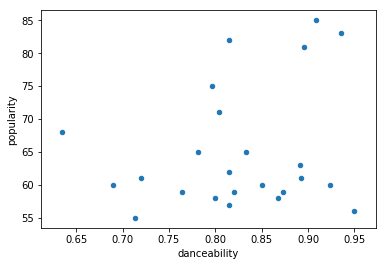

In [9]:
%matplotlib inline
df.plot.scatter(x='danceability', y='popularity')